# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<Double click this Markdown cell to make it editable, and record your answers here.>
1. The data set I have chosen is the "census" data set
2. We will be predicting an individual's workclass
3. It is a supervised learning, multi-class classification problem.  
4. The features will include age, education-num, capital-gain, capital-loss, hours-per-week, etc.
5. It is an important problem because a company or institution can create value by tailoring certain products or services based on the type of work a person does.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
#inspecting the data
rows_and_columns = df.shape
print(rows_and_columns)
column_names = df.columns
print(column_names)
first_ten_rows = df.head(10)
print(first_ten_rows)

(32561, 15)
Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')
    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   
5  37.0           Private  284582    Masters             14   
6  49.0           Private  160187        9th              5   
7  52.0  Self-emp-not-inc  209642    HS-grad              9   
8  31.0           Private   45781    Masters             14   
9  42.0           Private  159449  Bachelors             13   

          marital-status    

In [5]:
#define the label
df['workclass']

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, Length: 32561, dtype: object

In [6]:
features = [col for col in df.columns if col != 'workclass']
features

['age',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex_selfID',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income_binary']

In [7]:
nan_count = df.isnull().sum()
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [8]:
#create dummy variables that indicate missingness
df['age_na'] = df['age'].isnull()
df['hours-per-week_na'] = df['hours-per-week'].isnull()

#replace missing values with mean values of column
mean_age = df['age'].mean()
mean_hours = df['hours-per-week'].mean()
df['age'].fillna(value=mean_age, inplace=True)
df['hours-per-week'].fillna(value=mean_hours, inplace=True)
#check results for missing values
sum_age_missing = df['age'].isnull().sum()
print(sum_age_missing)
sum_hours_missing = df['hours-per-week'].isnull().sum()
print(sum_hours_missing)

0
0


In [9]:
# create dummy variables that indicate missingness
df['workclass_na'] = df['workclass'].isnull()
df['native_country_na'] = df['native-country'].isnull()

# replace missing values with placeholder category
df['workclass'].fillna('Unknown', inplace=True)
df['native-country'].fillna('Unknown', inplace=True)

# check results for missing values
sum_workclass_missing = df['workclass'].isnull().sum()
print(sum_workclass_missing)
sum_native_country_missing = df['native-country'].isnull().sum()
print(sum_native_country_missing)


0
0


In [10]:
# winsorize education-num to remove outliers (top and bottom 1%)
df['education_years'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])

# check if any values changed
differences = (df['education_years'] - df['education-num']).unique()
print("Differences between original and winsorized education values:", differences)

# drop the original education-num column
df.drop(columns=['education-num'], inplace=True)

Differences between original and winsorized education values: [0 1 2]


In [11]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
uniqueVal = df[categorical].nunique()
print(uniqueVal)

workclass          9
education         16
marital-status     7
occupation        14
relationship       6
race               5
sex_selfID         2
native-country    42
income_binary      2
dtype: int64


In [12]:
columns_inspect = ['education', 'sex_selfID','marital-status', 'relationship', 'race', 'native-country', 'occupation', 'income_binary']

for col in columns_inspect:
    print(f"{col}:")
    print(df[col].unique(), '\n')

education:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

sex_selfID:
['Non-Female' 'Female'] 

marital-status:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

relationship:
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race:
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Inuit' 'Other'] 

native-country:
['United-States' 'Cuba' 'Jamaica' 'India' 'Unknown' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand

In [13]:
#one hot encode
df_encoded = pd.get_dummies(df[columns_inspect])

In [14]:
df = pd.concat([df, df_encoded], axis=1)

In [15]:
df.drop(columns = columns_inspect, axis=1, inplace=True)
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'capital-gain', 'capital-loss',
       'hours-per-week', 'age_na', 'hours-per-week_na', 'workclass_na',
       'native_country_na',
       ...
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'income_binary_<=50K', 'income_binary_>50K'],
      dtype='object', length=105)


In [16]:
df.drop(columns=['fnlwgt'], inplace=True)
print(df.columns)

Index(['age', 'workclass', 'capital-gain', 'capital-loss', 'hours-per-week',
       'age_na', 'hours-per-week_na', 'workclass_na', 'native_country_na',
       'education_years',
       ...
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'income_binary_<=50K', 'income_binary_>50K'],
      dtype='object', length=104)


In [17]:
df.dtypes

age                            float64
workclass                       object
capital-gain                     int64
capital-loss                     int64
hours-per-week                 float64
                                ...   
occupation_Sales                 uint8
occupation_Tech-support          uint8
occupation_Transport-moving      uint8
income_binary_<=50K              uint8
income_binary_>50K               uint8
Length: 104, dtype: object

In [18]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week,education_years,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,income_binary_<=50K,income_binary_>50K
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.0000,32561.000000,32561.000000,32561.000000
mean,38.589216,615.907773,87.303830,40.450428,10.088971,0.028654,0.036086,0.013298,0.005160,0.010227,...,0.061485,0.101195,0.004576,0.127146,0.019932,0.112097,0.0285,0.049046,0.759190,0.240810
std,13.613868,2420.191974,402.960219,12.291939,2.547541,0.166834,0.186507,0.114550,0.071646,0.100612,...,0.240221,0.301591,0.067492,0.333142,0.139768,0.315491,0.1664,0.215968,0.427581,0.427581
min,17.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,0.000000
75%,48.000000,0.000000,0.000000,45.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,0.000000
max,90.000000,14084.000000,4356.000000,99.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000


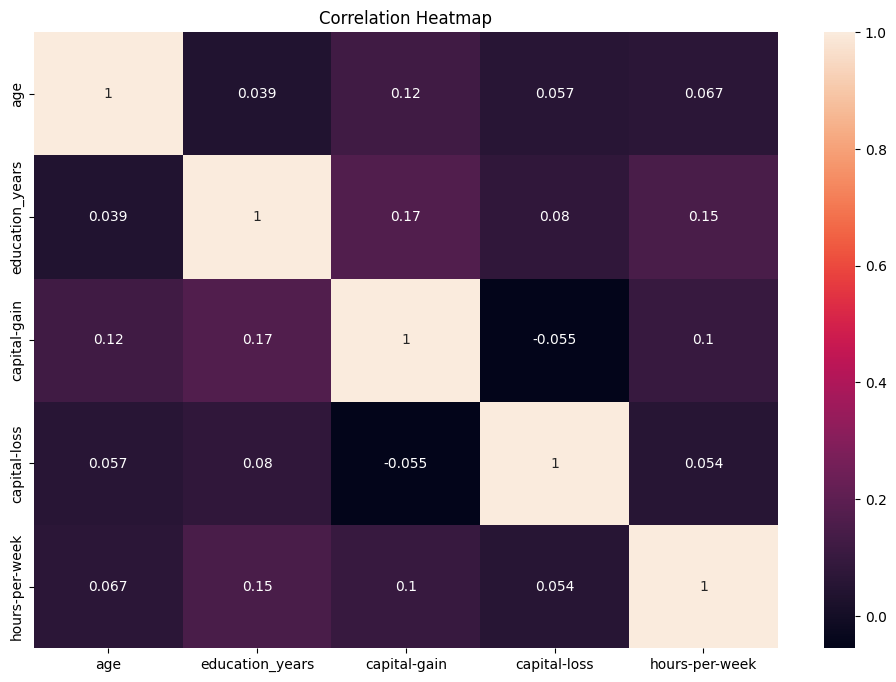

In [19]:
numeric_cols = ['age', 'education_years', 'capital-gain', 'capital-loss', 'hours-per-week']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

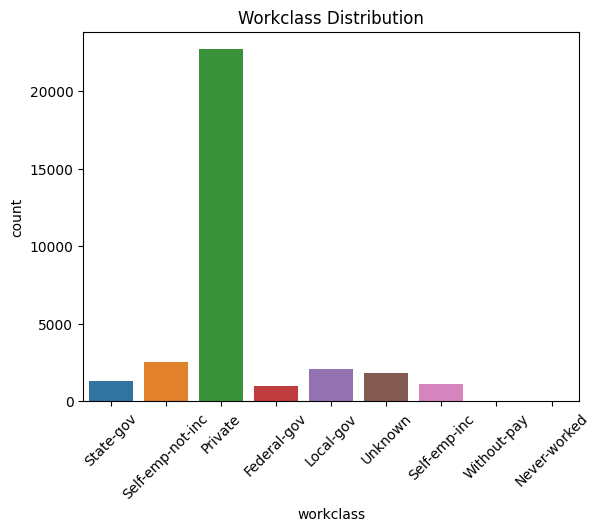

In [20]:
sns.countplot(data=df, x='workclass')
plt.title('Workclass Distribution')
plt.xticks(rotation=45)
plt.show()

In [21]:
#create labeled examples from dataset
y = df['workclass']
X = df.drop(columns = 'workclass', axis=1)

In [22]:
print(X.shape)
print(y.shape)
print(X.columns[:10])  # see some features
print(y.value_counts())  # check class balance

(32561, 103)
(32561,)
Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'age_na',
       'hours-per-week_na', 'workclass_na', 'native_country_na',
       'education_years', 'education_10th'],
      dtype='object')
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

<Double click this Markdown cell to make it editable, and record your answers here.>
-After inspecting the data, I have a new feature list that contains the numerical features alongside the encoded categorical features as well as the indicators for missingness. I removed the original categorical columns.
-I replaced the numerical missing values and replaced the categorical missing values. I also applied one-hot encoding to relevant categorical features.
-My models are the knn, decision tree, random forest, and gradient boosted decisiont trees.
-My plan is: Split the data into training and test sets, train several models including Random Forest and Gradient Boosted Trees, and evaluate them using accuracy and feature importance. I will then use GridSearchCV to tune hyperparameters and improve performance. I will also retrain models using the top features to reduce complexity. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [25]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    class_label_predictions = model.predict(X_test)
    acc_score=accuracy_score(y_test,class_label_predictions)
    return(acc_score)

In [26]:
k_vals = [3, 30, 300]
acc1 = []

for k in k_vals:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))

k=3, accuracy score: 0.6443853004401678
k=30, accuracy score: 0.7092844712867233
k=300, accuracy score: 0.7036544170334732


In [27]:
def train_test_DT(X_train, X_test, y_train, y_test, depth, leaf=1, crit='entropy'):
    
    model = DecisionTreeClassifier(criterion = crit, max_depth = depth, min_samples_leaf = leaf)
    model.fit(X_train,y_train)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    return(acc_score)

In [28]:
print(X_train.isnull().sum().sort_values(ascending=False).head())
print(y_train.isnull().sum())

age                           0
native-country_Ireland        0
native-country_Poland         0
native-country_Philippines    0
native-country_Peru           0
dtype: int64
0


In [29]:
depth1 = 8
depth2 = 32

max_depth_range = [depth1, depth2]
acc=[]

for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, md)
    print('max depth: ' + str(md) + ', accuracy score: ' +str(score))
    acc.append(float(score))

max depth: 8, accuracy score: 0.7699866925990377
max depth: 32, accuracy score: 0.647763332992118


In [30]:
#training with various depths for decision tree
depth1 = 1
depth2 = 2
depth3 = 4
depth4 = 8
depth5 = 16
depth6 = 32

acc = []

max_depth_range = [depth1, depth2, depth3, depth4, depth5, depth6]
for md in max_depth_range:
    score = train_test_DT(X_train, X_test, y_train, y_test, md)
    print('max depth: ' + str(md) + ', accuracy score: ' +str(score))
    acc.append(float(score))

max depth: 1, accuracy score: 0.7616951581533422
max depth: 2, accuracy score: 0.7616951581533422
max depth: 4, accuracy score: 0.7673252124065922
max depth: 8, accuracy score: 0.7696795987306787
max depth: 16, accuracy score: 0.7207493090387962
max depth: 32, accuracy score: 0.6468420513870407


In [31]:
#set up parameter grid for random forest classifier
md = [2**n for n in range(2, 6)]          # max_depth: [4, 8, 16, 32]
msl = [25*2**n for n in range(0, 3)]      # min_samples_leaf: [25, 50, 100]
param_grid = {'max_depth': md, 'min_samples_leaf': msl}


In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
#Grid search with 4-fold cross-validation
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=4)
rf_grid_search = rf_grid.fit(X_train, y_train)
print('Done')

Done


In [33]:
best_md = rf_grid_search.best_estimator_.max_depth
best_msl = rf_grid_search.best_estimator_.min_samples_leaf
print('Best value for max depth:', best_md)
print('Best value for min_samples_leaf:', best_msl)
print('Best accuracy score from cross-validation:', rf_grid_search.best_score_)

Best value for max depth: 32
Best value for min_samples_leaf: 25
Best accuracy score from cross-validation: 0.7578975078975079


In [34]:
model = RandomForestClassifier(max_depth=best_md, min_samples_leaf=best_msl)

#Fit the model to the training data 
model.fit(X_train, y_train)

# Use the predict() method to make predictions on the test data and assign the results to the variable
# 'class_label_predictions'
# YOUR CODE HERE
class_label_predictions = model.predict(X_test)

# Compute the accuracy score and assign the result to the variable 'acc_score'
# YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)

print('Accuracy score: {0}'.format(acc_score))

Accuracy score: 0.7681441293888832


In [35]:
#set up the parameter grid for decision tree classifier
md = [2**n for n in range(2,6)]
msl = [25*2**n for n in range(0,3)]
param_grid={'max_depth':md, 'min_samples_leaf':msl}

param_grid

{'max_depth': [4, 8, 16, 32], 'min_samples_leaf': [25, 50, 100]}

In [36]:
print('Running Grid Search...')

# Create a DecisionTreeClassifier model object without supplying arguments
model = DecisionTreeClassifier()

# Run a Grid Search with 4-fold cross-validation using our the model.
# Pass all relevant parameters to GridSearchCV and assign the output to the object 'grid'
grid = GridSearchCV(model, param_grid, cv=4)

# Fit the model to the training data and assign the fitted model to the 
# variable grid_search
grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [37]:
best_md = grid_search.best_estimator_.max_depth
best_msl = grid_search.best_estimator_.min_samples_leaf

# Print best performing hyperparameter configuration
print('Best value for max depth: {0}'.format(best_md))
print('Best value for the minimum number of samples required to be at a leaf node: {0}'
      .format(best_msl))

# Print best accuracy score resulting from this configuration
print('Accuracy score: {0}'.format(grid_search.best_score_))

Best value for max depth: 8
Best value for the minimum number of samples required to be at a leaf node: 50
Accuracy score: 0.7603545103545103


In [38]:
# Create a DecisionTreeClassifier model object and assign it to the variable 'model'
# YOUR CODE HERE
model = DecisionTreeClassifier(max_depth=best_md, min_samples_leaf=best_msl)

# Fit the model to the training data 
# YOUR CODE HERE
model.fit(X_train, y_train)

# Use the predict() method to make predictions on the test data and assign the results to the variable
# 'class_label_predictions'
# YOUR CODE HERE
class_label_predictions = model.predict(X_test)

# Compute the accuracy score and assign the result to the variable 'acc_score'
# YOUR CODE HERE
acc_score = accuracy_score(y_test, class_label_predictions)

print('Accuracy score: {0}'.format(acc_score))

Accuracy score: 0.7691677756167469


In [39]:
#Obtain "feature importance" scores from the model object and save the array to the variable 
# 'feature_imp'
feature_imp = model.feature_importances_

#Create a Pandas DataFrame with a list of all features and their scores. 
#Save the result to the variable 'df_features'
df_features = pd.DataFrame({'name': X_train.columns.values, 'imp': feature_imp})

#Sort df_features in descending order and
# save the result to the variable 'df_sorted'
df_sorted = df_features.sort_values(by='imp', ascending=False)

#Obtain the top 5 sorted feature names and save the result to list 'top_five' 
top_five = df_sorted.iloc[:5]['name'].tolist()
print('Top five features: {0}'.format(top_five))


Top five features: ['workclass_na', 'age', 'occupation_Protective-serv', 'occupation_Farming-fishing', 'occupation_Prof-specialty']


Text(0, 0.5, 'Normalized importance')

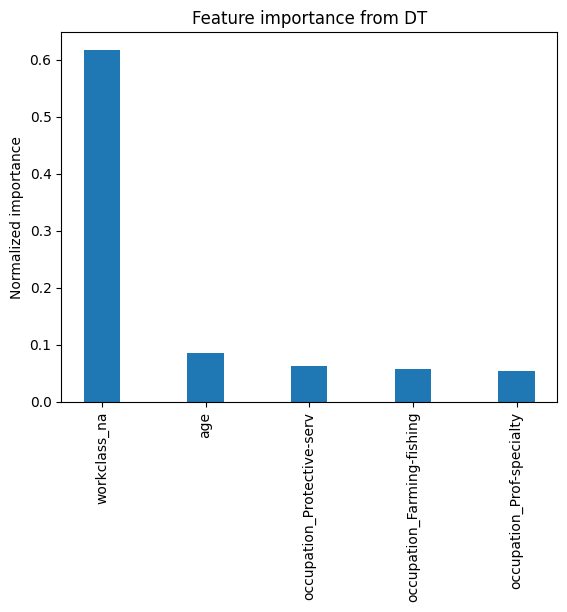

In [40]:
fig, ax = plt.subplots()
ax.bar(np.arange(5), sorted(model.feature_importances_, reverse=True)[:5], width = 0.35)
ax.set_xticks(np.arange(5))
ax.set_xticklabels(top_five, rotation = 90)
plt.title('Feature importance from DT')
ax.set_ylabel('Normalized importance')

In [41]:
top_cols = df_sorted.iloc[:5]['name'].tolist()
X_train_top = X_train[top_cols]
X_test_top = X_test[top_cols]


In [42]:
# Retrain Decision Tree on top 5 features
model_top = DecisionTreeClassifier(max_depth=best_md, min_samples_leaf=best_msl)
model_top.fit(X_train_top, y_train)
pred_top = model_top.predict(X_test_top)
acc_top = accuracy_score(y_test, pred_top)
print("Accuracy using top 5 features:", acc_top)


Accuracy using top 5 features: 0.7719316204319787


In [ ]:
print('hi')

In [43]:
#set up parameter grid for gradient boosting classifier
md = [2**n for n in range(2, 6)]          # max_depth: [4, 8, 16, 32]
msl = [25*2**n for n in range(0, 3)]      # min_samples_leaf: [25, 50, 100]
param_grid = {'max_depth': md, 'min_samples_leaf': msl}
param_grid

{'max_depth': [4, 8, 16, 32], 'min_samples_leaf': [25, 50, 100]}

In [ ]:
print('Running Grid Search...')
model = GradientBoostingClassifier()
grid = GridSearchCV(model, param_grid, cv=4)
grid_search = grid.fit(X_train, y_train)
print('Done')

Running Grid Search...


In [ ]:
best_md = grid_search.best_estimator_.max_depth
best_msl = grid_search.best_estimator_.min_samples_leaf

# Print best performing hyperparameter configuration
print('Best value for max depth: {0}'.format(best_md))
print('Best value for the minimum number of samples required to be at a leaf node: {0}'
      .format(best_msl))

# Print best accuracy score resulting from this configuration
print('Accuracy score: {0}'.format(grid_search.best_score_))

In [ ]:
# Train best model on full training set
model = GradientBoostingClassifier(max_depth=best_md,min_samples_leaf=best_msl)
model.fit(X_train, y_train)

# Make predictions
class_label_predictions = final_model.predict(X_test)

# Evaluate on test data
acc_score = accuracy_score(y_test, class_label_predictions)
print('Test accuracy score:', acc_score)